In [1]:
import warnings

warnings.filterwarnings("ignore")

In [2]:
import os

from dotenv import load_dotenv

load_dotenv()


GROQ_API_KEY  = os.getenv("GROQ_API_KEY")
os.environ["GROQ_API_KEY"] = GROQ_API_KEY

concept of pydantic , (multilevel check in runtme) ?? pls do it also

check out the promp chaining defination also

In [3]:
from langchain_groq import ChatGroq

llm = ChatGroq(model="Gemma2-9b-It")

In [4]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph , START , END

from IPython.display import Image , display

In [5]:
class State(TypedDict):
    topic : str
    joke : str
    improved_joke : str
    final_joke : str

In [6]:
def generate_joke(state):

    """ First LLM Call to generate Jokes """

    response = llm.invoke(f"Write a short joke about { state['topic'] }")

    return {"joke" : response.content}

In [7]:
def check_punchline(state):

    """ Gate Function to check if the joke has a punchline or not """

    if "?" in state['joke'] or "!" in state['joke'] :
        return "Fail"
    
    return "Pass"

In [8]:
def improve_joke(state):

    """ Second LLM CALL to improve the joke """

    response = llm.invoke(f" Make this joke funnier by adding wordplay : {state['joke']} ")

    return { "improved_joke" : response.content}


In [9]:
def polish_joke(state):

    """ Third LLM CALL to polish the joke """

    response = llm.invoke(f" Add a surprising twist to this joke : {state['improved_joke']} ")

    return { "final_joke" : response.content}


In [10]:
graph_builder = StateGraph(State)

graph_builder.add_node( "generate_joke"  , generate_joke)
graph_builder.add_node( "improve_joke"  , improve_joke)
graph_builder.add_node( "polish_joke"  , polish_joke)

graph_builder.add_edge(START , "generate_joke")
graph_builder.add_conditional_edges(
    "generate_joke" ,
    check_punchline,
    {"Fail" : "improve_joke" , "Pass" : END }
)
graph_builder.add_edge( "improve_joke" , "polish_joke" )
graph_builder.add_edge("polish_joke" , END)

graph = graph_builder.compile()

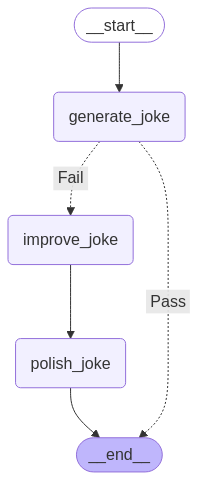

In [11]:
display(
    Image(   
        graph.get_graph().draw_mermaid_png()
    )
)

In [12]:
state = graph.invoke({ "topic" : "Apple"})

In [13]:
state

{'topic': 'Apple',
 'joke': 'Why did the Apple go to the bank? \n\nTo get its byte! 🍎💸  \n',
 'improved_joke': 'Why did the Apple go to the bank? \n\nTo get its **byte** of the **interest**! 🍎💸 \n\n\nI added "interest" to play on the double meaning of the word:\n\n* **Interest** as a financial term (what you earn on savings)\n* **Interest** as a feeling of curiosity or attention \n\n\nLet me know if you\'d like to try brainstorming some other wordplay options!  😄 \n',
 'final_joke': "Here's a twist that leans into the absurdity:\n\nWhy did the Apple go to the bank? \n\nTo get its **byte** of the **interest**... but it forgot its **password**! 🍎💸🔒 \n\nThis adds a layer of  unexpected relatability by referencing something we all struggle with: remembering passwords.  \n\n\nLet me know if you'd like to explore more twists!  \n\n"}

In [14]:
print(state.keys())
print(state['final_joke'])

dict_keys(['topic', 'joke', 'improved_joke', 'final_joke'])
Here's a twist that leans into the absurdity:

Why did the Apple go to the bank? 

To get its **byte** of the **interest**... but it forgot its **password**! 🍎💸🔒 

This adds a layer of  unexpected relatability by referencing something we all struggle with: remembering passwords.  


Let me know if you'd like to explore more twists!  




# ASSIGNMENT 

code peer review 

coder -> peer (review) -> Manager (doc string final)

code -> review -> generate test cases -> run the test cases -> analyze the failed test cases -> give summary

In [15]:
# pls do the assignment 

# PARALLELIZATION

With parallelization , LLM works simultaneously on a task.

LLMs can sometimes work simultanously on a task and have their outputs aggregated programmatically.
This worklow parallization manifests in two key variations:

Sectioning : Breaking a task into two independant subtasks run in parallel.

Voting : Running the same task multiple times to get diverse output.




In [16]:
class State(TypedDict):

    topic : str
    joke : str
    poem : str
    story : str
    content : str

In [17]:
def call_for_joke(state : State):
    
    """LLM call for joke """

    response = llm.invoke( f" Write a joke about {state['topic']} " )

    return { "joke" : response.content }

def call_for_poem(state : State):
    
    """LLM call for poem """

    response = llm.invoke( f" Write a poem about {state['topic']} " )

    return { "poem" : response.content }

def call_for_story(state : State):
    
    """LLM call for story """

    response = llm.invoke( f" Write a story about {state['topic']} " )

    return { "story" : response.content }

In [18]:
def aggregator(state):

    """ LLM call for combining poem , joke , story """
    
    response = llm.invoke(

        f" I am providing with you story , poem and joke related to {state['topic']} , pls combiend all into to form a content .Here is the deatils Story : {state['story']} , Poem : {state['poem']} and Joke : {state['joke']}"

    )
    
    return { "content" : response.content }

In [19]:
graph_builder = StateGraph(State)

graph_builder.add_node( "call_for_joke" , call_for_joke )
graph_builder.add_node( "call_for_poem" , call_for_poem )
graph_builder.add_node( "call_for_story" , call_for_story )
graph_builder.add_node("aggregator" , aggregator)

graph_builder.add_edge(START , "call_for_joke")
graph_builder.add_edge(START , "call_for_poem")
graph_builder.add_edge(START , "call_for_story")
graph_builder.add_edge("call_for_joke" , "aggregator")
graph_builder.add_edge("call_for_poem" , "aggregator")
graph_builder.add_edge("call_for_story" , "aggregator")
graph_builder.add_edge("aggregator" , END)

graph = graph_builder.compile()

In [20]:
# display(
#     Image(graph.get_graph().draw_mermaid_png())
# )

In [21]:
state = graph.invoke( {"topic" : "Jaguar"} )

In [22]:
print(state.keys())

dict_keys(['topic', 'joke', 'poem', 'story', 'content'])


In [23]:
state

{'topic': 'Jaguar',
 'joke': "Why did the Jaguar cross the road? \n\nTo prove it wasn't chicken! 🐆  \n",
 'poem': 'A flash of bronze beneath the sun,\nA whisper through the jungle spun.\nThe jaguar wakes, a silent grace,\nWith emerald eyes that pierce the space.\n\nA muscle rippling, sleek and strong,\nA hunter born, where he belongs.\nThrough tangled vines and dappled light,\nHe stalks his prey with silent might.\n\nA velvet paw, a deadly claw,\nA king untamed, defying law.\nHe roams the night, a phantom bold,\nHis story whispered, ages old.\n\nA symbol fierce, a spirit wild,\nThe jaguar reigns, untamed and mild.\nA creature born of ancient lore,\nForevermore, forevermore. \n\n\n',
 'story': 'The rain hammered the jungle canopy, a relentless drumbeat against the emerald leaves. A jaguar, named Inti, crouched low beneath a tangle of vines, his tawny coat blending seamlessly with the dappled light. His amber eyes, slitted and sharp, focused on a clearing ahead. There, a young tapir graz

# ROUTING

Routing classifies an input and directs it to a specialized followup task. This workflow allows for 
seperation of concerns , and building more specialized prompts . Without this workflow , optimizing 
for one kind of input can hurt performance on other inputs.

When to use this workflow : Routing works well for complex tasks where there are distinct categories that
are better handled seperately , and where classification can be handled accurately either by LLM or more traditional classification model / algorithm 

eg : let say you have to route mail to the tech team , support team or marketing team.

In [24]:
from typing_extensions import Literal
from pydantic import BaseModel , Field
from langchain_core.messages import HumanMessage , SystemMessage

#schema for structured output to use as a routing logic
class Route(BaseModel):
    step : Literal["poem" , "story" , "joke"] = Field(
        default = None , description = "The next step in the routing process"
    )

# Augment the llm with schema for structured output
router = llm.with_structured_output(Route)

# State
class State(TypedDict):
    input : str
    decision : str
    output : str

# Nodes
def llm_call_story(state : State):
    "Write a story" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }

def llm_call_joke(state : State):
    "Write a joke" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }

def llm_call_poem(state : State):
    "Write a poem" 
    result = llm.invoke(state["input"])
    return { "output" : result.content }


In [25]:
def llm_call_router(state : State):
    "Route the input to the apprpriate node"

    decision = router.invoke(
        [
            SystemMessage(
                content = "Route the input to story,joke , or poem based on the user's request"
            ),
            HumanMessage(content=state["input"])
        ]
    )

    return {"decision" : decision.step}


In [26]:
# Conditional edge function route to the appropriate node
def route_decision(state : State):
    "Return the node name you want to visit next"
    if state["decision"] == "story":
        return "llm_call_story"
    elif state["decision"] == "poem":
        return "llm_call_poem"
    else:
        return "llm_call_joke"

In [27]:
router_builder = StateGraph(State)

router_builder.add_node("llm_call_joke" , llm_call_joke)
router_builder.add_node("llm_call_story" , llm_call_story)
router_builder.add_node("llm_call_poem" , llm_call_poem)
router_builder.add_node("llm_call_router" , llm_call_router)

router_builder.add_edge(START , "llm_call_router")
router_builder.add_conditional_edges(
    "llm_call_router",route_decision,
    {
        # Name returned by route decision : name of next node to visit
        "llm_call_story" : "llm_call_story" ,
        "llm_call_poem" : "llm_call_poem" ,
        "llm_call_joke" : "llm_call_joke"
    }
)

router_builder.add_edge("llm_call_joke" , END)
router_builder.add_edge("llm_call_poem" , END)
router_builder.add_edge("llm_call_story" , END)

In [28]:
router_graph = router_builder.compile()

In [29]:
# display(
#     Image(router_graph.get_graph().draw_mermaid_png())
# )

In [30]:
state = router_graph.invoke({"input" : "Write a joke about cats"})
print(state["output"])

Why don't cats play poker in the jungle? 

Too many cheetahs! 😸  



# Orchestrator - Worker

In the orchestrator-worker's workflow , a central LLM dynamically breaks down tasks , delegates them to worker LLMS , and synthesize their results.

When to use this workflow : This workflow is well suited for complex tasks where you can't predict the subtasks needed.
(in coding , for example the number of files that need to be changed and the nature of change in each file likely depend on the task). Where it's topographically similar , the key differences from parallelization is its flexibility-subtasks are not predefined , but determined by orchestrator based on the specifi input.

orchestrator (break down the task into subtask )-> subtask -> Synthesizer (combine all the task)

In [31]:
from typing import Annotated , List
import operator

class Section(BaseModel):
    name : str = Field(
        description="Name for this section of the report"
    )
    description : str = Field(
        description="Brief overview of the main topics and concepts to be covered in this section"
    )

class Sections(BaseModel):
    sections : List[Section] = Field(
        description="Sections of the report"
    )

planner = llm.with_structured_output(Sections)

# Creating Workers in LangGraph

Because Orchestrator-worker workflows are common , LangGraph has the SEND Api to support this. It lets you dynamically 
create worker nodes and send each one a specific input . Each worker has its own state , and all workers output are written to a shared state key that is accessible to the orchestrator graph . This gives the orchestrator access to all 
worker output and allows it to synthesize them into a final output.As you can see below , we iterate over a list of sections and send each to a Worker node.

In [32]:
from langgraph.constants import Send

# Graph state 
class State(TypedDict):
    topic : str # Report topic
    sections : list[Section] # List of report sections
    completed_sections : Annotated[
        list , operator.add
    ] # all workers write to this key in parallel
    final_report : str # Final report

# Worker State 
class WorkerState(TypedDict):
    section : Section
    completed_sections : Annotated[ list , operator.add ]

In [33]:
# Nodes

def orchestrator(state : State):

    """Orchestrator that generates a plan for the report"""

    # Generate queries
    report_sections = planner.invoke(
        [
            SystemMessage(content="Generate a plan for the report"),
            HumanMessage(content=f"Here is the report topic : { state['topic'] }" ) 
        ]
    )

    print(report_sections)

    return { "sections" : report_sections.sections}

In [34]:
def llm_call(state : WorkerState):

    """Worker writes a section of the report"""

    # Generate section

    section = llm.invoke(
        [

            SystemMessage(content = " Write a report section following the provided name and description.Includes no preamble for each section"),
            HumanMessage(content=f"Here is the section name : {state['section'].name} and description {state['section'].description} ")

        ]
    )

    print(section)

    return {"completed_sections" : [section.content]}


In [35]:
def synthesizer(state : State):

    "Synthesize full report from sections"

    # list of completed sections
    completed_sections = state["completed_sections"]

    # Format completed sections to str to use as context for final sections
    completed_report_sections = "\n\n--\n\n".join(completed_sections)

    return {"final_report" : completed_report_sections}


In [36]:
# Conditional edge function to create llm_call workers that each write a section of the report
def assign_workers(state : State):

    "Assign a worker to each section in the plan"

    # kick-off section writing in parallel via SEND() API

    print("Assigning workers")
    
    return [ Send ("llm_call" , {"section" : s} ) for s in state["sections"]  ]

In [37]:
orchestrator_worker_builder = StateGraph(State)

# add the nodes 
orchestrator_worker_builder.add_node("orchestrator",orchestrator)
orchestrator_worker_builder.add_node("llm_call",llm_call)
orchestrator_worker_builder.add_node("synthesizer",synthesizer)

orchestrator_worker_builder.add_edge(START , "orchestrator")
orchestrator_worker_builder.add_conditional_edges(
    "orchestrator",assign_workers,["llm_call"]
)
orchestrator_worker_builder.add_edge("llm_call" , "synthesizer")
orchestrator_worker_builder.add_edge("synthesizer",END)

In [38]:
orchestrator_worker = orchestrator_worker_builder.compile()

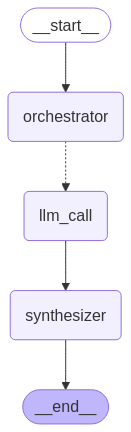

In [39]:
display(
    Image(
        orchestrator_worker.get_graph().draw_mermaid_png()
    )
)

In [40]:
state = orchestrator_worker.invoke({"topic" : "Create a report on agentic ai RAGS"})

sections=[Section(name='Introduction', description='Overview of agentic AI and its potential impact'), Section(name='RAGS Architecture and Functionality', description='Detailed explanation of RAGS architecture, components, and how it achieves agentic behavior'), Section(name='Applications of RAGS', description='Examples of real-world or potential applications of RAGS in various domains'), Section(name='Ethical Considerations', description='Discussion of the ethical implications of agentic AI, particularly RAGS'), Section(name='Conclusion', description='Summary of key findings and future directions for agentic AI research')]
Assigning workers
content='## Conclusion \n\nThis study revealed several key findings regarding agentic AI.  [Summarize 2-3 most important findings from your research here. Use specific examples and data points where relevant].  These findings suggest that [briefly state the implications of your findings].  \n\nMoving forward,  research into agentic AI should focus 

In [41]:
from IPython.display import Markdown
# Markdown(state["final_report"])   # to get in better format
state["final_report"]

'## Introduction and Overview of Agentic AI and Its Potential Impact\n\nAgentic AI refers to artificial intelligence systems designed to act autonomously and make decisions in complex environments. Unlike traditional AI systems that rely on explicit programming, agentic AI learns and adapts through interactions with its environment, exhibiting goal-directed behavior and the capacity to reason, plan, and execute actions. This autonomy stems from the integration of machine learning, reinforcement learning, and decision-making algorithms, enabling agents to perceive their surroundings, understand context, and choose actions that maximize their chances of achieving predefined goals.\n\nAgentic AI holds immense potential to revolutionize various sectors, including:\n\n* **Healthcare:**  Autonomous agents could assist doctors in diagnosing diseases, analyzing medical images, and personalizing treatment plans.\n* **Manufacturing:** Robots powered by agentic AI could optimize production proces

# EVALUATOR - OPTIMIZER 

In the evaluation-optimizer workflow , one LLM generates a response while another provides evaluation and feedback in a loop.

When to use this workflow : This workflow is particularly effective when we have clear evaluation creteria ,and iterative refinement provides measurable value . The two signs of good fit are , first , that LLM responses can be 
demonstrably improved when a human articulates their feedback ; and second , that the LLM can provide such feedback .
This is analogous to the iterative writing process a human writer might go through when producing a polished document.

In [42]:
# Graph State 

class State(TypedDict):

    topic : str
    mail_content : str
    feedback : str
    spam_or_not : str  # this is our evaluation criteria


# Schema for structured output to use in evaluation
class Feedback(BaseModel):

    grade : Literal[ "spam" , "not_spam" ] = Field(
        description="Decide if mail_content is spam or not "
    )

    feedback : str = Field(
        description="If the mail_content is spam , provide feedback on how to improve it."
    )

# Augment the LLM with schema for structured output
evaluator = llm.with_structured_output(Feedback)

In [43]:
# Nodes 
def llm_call_generator(state : State):

    "LLM generates a mail content"

    print("Hi i am here in the generator")

    if state.get("feedback"):
        response = llm.invoke(
            f"Write a mail_content related to {state['topic']} but take into account the feedback : {state['feedback']}"
        )
    else:
        response = llm.invoke(f"Write a mail_content related to {state['topic']}")
    
    return {"mail_content" : response.content}


def llm_call_evaluator(state : State):

    "LLM evaulates the mail_content"

    print("Hi i am here in the evaluator")

    evaluation = evaluator.invoke(f"Classify the mail_content : {state['mail_content']} ")

    return {"spam_or_not" : evaluation.grade , "feedback" : evaluation.feedback}


In [44]:
# Conditional Edge function to route back to mail generator or end based upon the feedback from evaluator

def route_path(state : State):

    """route back to mail generator or end based upon the feedback from evaluator"""

    if state["spam_or_not"] == "not_spam":
        return "Accepted"
    
    return "Rejected + Feedback"



In [45]:
optimizer_builder = StateGraph(State)

optimizer_builder.add_node("llm_call_generator" , llm_call_generator)
optimizer_builder.add_node("llm_call_evaluator" , llm_call_evaluator)

optimizer_builder.add_edge(START , "llm_call_generator")
optimizer_builder.add_edge("llm_call_generator","llm_call_evaluator")
optimizer_builder.add_conditional_edges(
    "llm_call_evaluator",
    route_path,
    {
        "Accepted" : END,
        "Rejected + Feedback" : "llm_call_generator"
    }
)

optimizer_workflow = optimizer_builder.compile()

In [46]:
# display(
#     Image(
#         optimizer_workflow.get_graph().draw_mermaid_png()
#     )
# )

In [47]:
state = optimizer_workflow.invoke({ "topic" : "Hey i want to advertise for Car , write me a mail related to it" })


Hi i am here in the generator
Hi i am here in the evaluator


In [48]:
state

{'topic': 'Hey i want to advertise for Car , write me a mail related to it',
 'mail_content': "## Subject:  Reach Thousands of Potential Car Buyers with [Your Business Name]!\n\nHey [Name],\n\nLooking to sell your car quickly and efficiently? \n\n[Your Business Name] can help! We specialize in connecting car sellers with eager buyers through our [mention your platform, e.g., website, app, social media channels].  \n\n**Here's why advertising your car with us is a smart move:**\n\n* **Targeted Audience:** We reach a large audience of car enthusiasts actively searching for vehicles like yours.\n* **Professional Listings:**  We'll help you create eye-catching listings with high-quality photos and detailed descriptions to showcase your car's best features.\n* **Seamless Communication:** Our platform facilitates easy communication between buyers and sellers, streamlining the selling process.\n* **Competitive Pricing:** We offer affordable advertising packages to fit your budget and maximize

# Human in the Loop

Review for Human in the loop , we often want to see our graph output as its running.

We laid the foundations for this with running.



Three main purpose : 

1.Approval (Interrupt the agent at any point of time and give feedback if any) : We can interrupt our agent , surface state to a user , and allow the user to accept an action.

2.Debugging (To check the entire graph , how is the flow of execution) : We can rewind the reproduce or avoid issues.

3.Editing : You can modify the state.


LangGraph offers several ways to get or update agent state to support various human-in-the-loop workflows.

In [49]:
def add(a : int ,b : int) -> int:


    """ Add a and b

    Args :

    a : first int
    b : second int
    
    """

    return a + b

def multiply(a : int ,b : int) -> int :

    """ Multiply a and b

    Args :

    a : first int
    b : second int
    
    """

    return a * b

def divide(a : int , b : int) -> int :

    """ Divide a by b

    Args :

    a : first int
    b : first int

    """

    return a / b

def sqrt(a : int ) -> int :

    """ Multiply a and a

    Args :

    a : first int

    """

    return a * a

In [50]:
tools = [add , multiply , divide , sqrt]

llm_with_tools = llm.bind_tools(tools)

In [51]:
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph , MessagesState , START , END
from langgraph.prebuilt import tools_condition , ToolNode
from langchain_core.messages import AIMessage , HumanMessage , SystemMessage

In [52]:
sys_mssg = SystemMessage(content = "You are an helpful assistant tasked with performing arithmetic on a set of input ")


In [53]:
def assistant(state : MessagesState):
    return { "messages" : [ llm_with_tools.invoke([sys_mssg] + state["messages"]) ] }

In [54]:
builder = StateGraph(MessagesState)

builder.add_node("assistant" , assistant)
builder.add_node("tools" , ToolNode(tools))

builder.add_edge(START , "assistant")
builder.add_conditional_edges("assistant" , tools_condition)
builder.add_edge("tools" , "assistant")

In [55]:
memory = MemorySaver()

# interrupt before -> human in the loop
graph = builder.compile( interrupt_before = ["tools"] , checkpointer=memory )

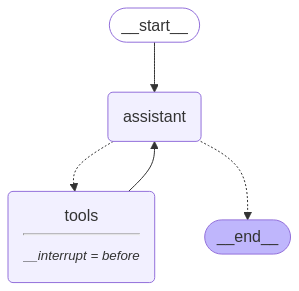

In [56]:
from IPython.display import Image , display

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [57]:
initial_input = {"messages" : HumanMessage(content="Multiply 2 and 3")}
thread = {"configurable" : {"thread_id" : "1"}}

invoke is used for just invoking the input

stream has two parameters and has two modes i.e updates and values

        mode = "updates"            mode = "values"

node1 :                {"messages" : ["a"]}       {"messages" : ["a"]} 


node2 :                {"messages" : ["b"]}       {"messages" : ["a","b"]}


node3 :                {"messages" : ["c"]}       {"messages" : ["a","b","c"]}


In [58]:
for event in graph.stream(initial_input , thread , stream_mode="values"):
    event['messages'][-1].pretty_print()

# note as soon we get a tool call , it gets triggered.

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_0anv)
 Call ID: call_0anv
  Args:
    a: 2
    b: 3


In [59]:
state = graph.get_state(thread)
state

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='b41d3b63-1c96-4e2f-8588-9729a713fc0d'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0anv', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1361, 'total_tokens': 1448, 'completion_time': 0.158181818, 'prompt_time': 0.047400018, 'queue_time': 0.238372101, 'total_time': 0.205581836}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-191bdff0-f81c-4110-a56a-80701c1a3fdc-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_0anv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1361, 'output_tokens': 87, 'total_tokens': 1448})]}, next=('tools',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '

In [60]:
state.next
#i.e next state is tools and we have to execute it.

('tools',)

In [61]:
state

StateSnapshot(values={'messages': [HumanMessage(content='Multiply 2 and 3', additional_kwargs={}, response_metadata={}, id='b41d3b63-1c96-4e2f-8588-9729a713fc0d'), AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_0anv', 'function': {'arguments': '{"a":2,"b":3}', 'name': 'multiply'}, 'type': 'function'}]}, response_metadata={'token_usage': {'completion_tokens': 87, 'prompt_tokens': 1361, 'total_tokens': 1448, 'completion_time': 0.158181818, 'prompt_time': 0.047400018, 'queue_time': 0.238372101, 'total_time': 0.205581836}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run-191bdff0-f81c-4110-a56a-80701c1a3fdc-0', tool_calls=[{'name': 'multiply', 'args': {'a': 2, 'b': 3}, 'id': 'call_0anv', 'type': 'tool_call'}], usage_metadata={'input_tokens': 1361, 'output_tokens': 87, 'total_tokens': 1448})]}, next=('tools',), config={'configurable': {'thread_id': '1', 'checkpoint_ns': '', 'checkpoint_id': '

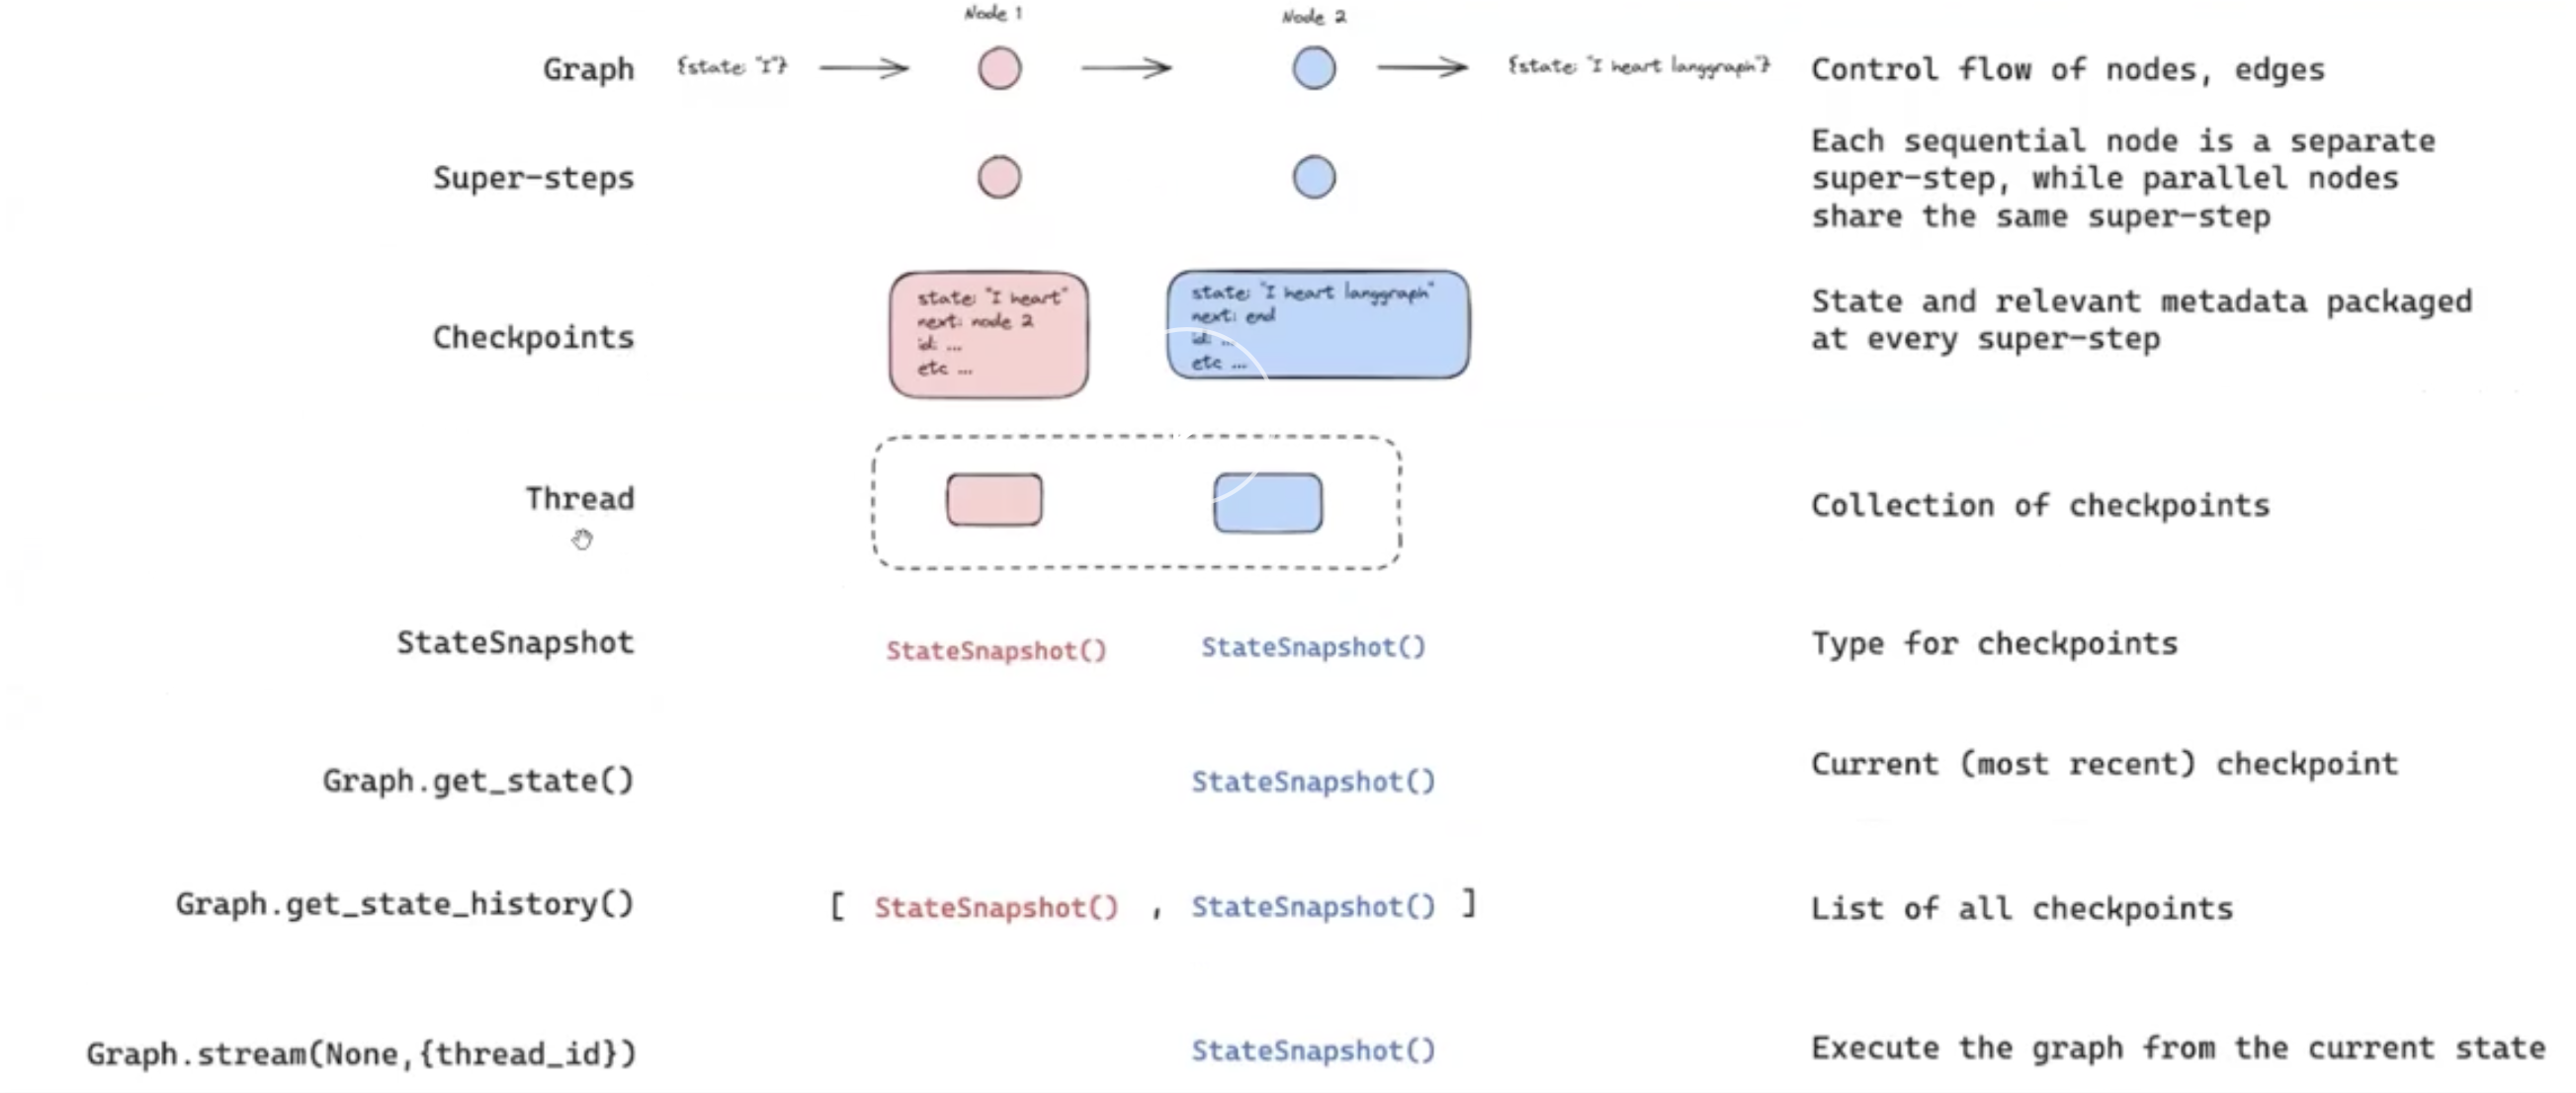

In [62]:
from IPython.display import Image, display
display(Image(filename='/Users/akashjain/Desktop/LangGraph/Util/LangGraph_state.png')) 


In [63]:
# if you don't want to give any input just give None
for event in graph.stream(None,thread,stream_mode="values"):
    event["messages"][-1].pretty_print()

================================== Ai Message ==================================
Tool Calls:
  multiply (call_0anv)
 Call ID: call_0anv
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================== Ai Message ==================================

6


In [64]:
state = graph.get_state(thread)
state.next

()

In [65]:
builder = StateGraph(MessagesState)

builder.add_node("assistant" , assistant)
builder.add_node("tools" , ToolNode(tools))

builder.add_edge(START , "assistant")
builder.add_conditional_edges("assistant" , tools_condition)
builder.add_edge("tools" , "assistant")

In [66]:
# interrupt before -> human in the loop
graph = builder.compile( interrupt_after = ["tools"] , checkpointer=memory )

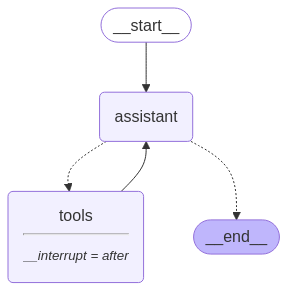

In [67]:
from IPython.display import Image , display

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [68]:
thread = {"configurable" : {"thread_id" : "2"}}

In [69]:
for event in graph.stream(initial_input , thread , stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_zm90)
 Call ID: call_zm90
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6


In [70]:
state = graph.get_state(thread)
state.next

('assistant',)

In [71]:
for event in graph.stream({"messages" : HumanMessage(content="Multiply it by 10 now")} , thread , stream_mode="values"):
    event['messages'][-1].pretty_print()

================================ Human Message =================================

Multiply it by 10 now
================================== Ai Message ==================================
Tool Calls:
  multiply (call_ybtw)
 Call ID: call_ybtw
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: multiply

60


In [72]:
state = graph.get_state(thread)
state.next

('assistant',)

In [73]:
state_values = state.values
for m in state_values["messages"]:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_zm90)
 Call ID: call_zm90
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================ Human Message =================================

Multiply it by 10 now
================================== Ai Message ==================================
Tool Calls:
  multiply (call_ybtw)
 Call ID: call_ybtw
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: multiply

60


# Edit Human Feedback 

In [74]:
graph.update_state(thread , {"messages" : [HumanMessage(content="No acutally you have to multiply by 8")]})

{'configurable': {'thread_id': '2',
  'checkpoint_ns': '',
  'checkpoint_id': '1f01b48e-33c4-6b26-8007-07d6914f8f21'}}

In [75]:
new_state = graph.get_state(thread).values
for m in new_state["messages"]:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_zm90)
 Call ID: call_zm90
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================ Human Message =================================

Multiply it by 10 now
================================== Ai Message ==================================
Tool Calls:
  multiply (call_ybtw)
 Call ID: call_ybtw
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: multiply

60
================================ Human Message =================================

No acutally you have to multiply by 8


In [76]:
for event in graph.stream(None , thread , stream_mode="values"):
    event["messages"][-1].pretty_print()

================================ Human Message =================================

No acutally you have to multiply by 8
================================== Ai Message ==================================
Tool Calls:
  multiply (call_dywt)
 Call ID: call_dywt
  Args:
    a: 60
    b: 8
================================= Tool Message =================================
Name: multiply

480


In [77]:
state = graph.get_state(thread).values
for m in state["messages"]:
    m.pretty_print()

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (call_zm90)
 Call ID: call_zm90
  Args:
    a: 2
    b: 3
================================= Tool Message =================================
Name: multiply

6
================================ Human Message =================================

Multiply it by 10 now
================================== Ai Message ==================================
Tool Calls:
  multiply (call_ybtw)
 Call ID: call_ybtw
  Args:
    a: 6
    b: 10
================================= Tool Message =================================
Name: multiply

60
================================ Human Message =================================

No acutally you have to multiply by 8
================================== Ai Message ==================================
Tool Calls:
  multiply (call_dywt)
 Call ID: call_dywt
  Args:
    a: 60

# Wait for User Input

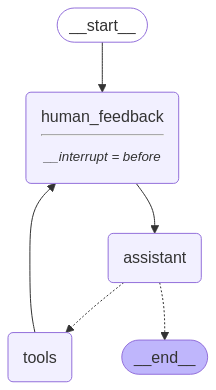

In [78]:
# system message
sys_mssg = SystemMessage(content = "You are an helpful assistant tasked with performing arithmetic on a set of input ")

# no-o/p node that should be interrupted on
def human_feedback(state : MessagesState):
    pass

# Assistant node
def assistant(state : MessagesState):
    return { "messages" : [ llm_with_tools.invoke([sys_mssg] + state["messages"]) ] }


builder = StateGraph(MessagesState)

builder.add_node("assistant" , assistant)
builder.add_node("human_feedback" , human_feedback)
builder.add_node("tools" , ToolNode(tools))

builder.add_edge(START , "human_feedback")
builder.add_edge( "human_feedback" , "assistant" )
builder.add_conditional_edges("assistant" , tools_condition)
builder.add_edge("tools" , "human_feedback")

memory = MemorySaver()

# interrupt before -> human in the loop
graph = builder.compile( interrupt_before = ["human_feedback"] , checkpointer=memory )

display(
    Image(
        graph.get_graph().draw_mermaid_png()
    )
)

In [79]:
initial_input = {"messages" : "Multiply 2 and 3"}
thread = {"configurable" : {"thread_id" : "3"}}

In [82]:
for event in graph.stream(initial_input , thread , stream_mode="values" ):
    event["messages"][-1].pretty_print()

state = graph.get_state(thread)
print(state.next)

# get user input 
user_input = input("Tell me how you want to update the state : ")

graph.update_state(thread , {"messages" : user_input} , as_node="human_feedback")


state = graph.get_state(thread)
print(state.next)

for event in graph.stream(None, thread , stream_mode="values" ):
    event["messages"][-1].pretty_print()

state = graph.get_state(thread)
print(state.next)

================================ Human Message =================================

Multiply 2 and 3
('human_feedback',)
('assistant',)
================================ Human Message =================================

No , pls add 5 and 6
================================== Ai Message ==================================
Tool Calls:
  add (call_gy5s)
 Call ID: call_gy5s
  Args:
    a: 5
    b: 6
================================= Tool Message =================================
Name: add

11
('human_feedback',)


In [83]:
# it is again interrupted 
for event in graph.stream(None , thread , stream_mode="values" ):
    event["messages"][-1].pretty_print()

state = graph.get_state(thread)
print(state.next)

================================= Tool Message =================================
Name: add

11
================================== Ai Message ==================================

11
()


In [86]:
state = graph.get_state(thread)
print(state.next)

state = graph.get_state(thread).values
for m in state["messages"]:
    m.pretty_print()



()
================================ Human Message =================================

Multiply 2 and 3
================================ Human Message =================================

Multiply 2 and 3
================================ Human Message =================================

Multiply 2 and 3
================================ Human Message =================================

No , pls add 5 and 6
================================== Ai Message ==================================
Tool Calls:
  add (call_gy5s)
 Call ID: call_gy5s
  Args:
    a: 5
    b: 6
================================= Tool Message =================================
Name: add

11
================================== Ai Message ==================================

11
